In [1]:
# !pip install tensorflow-gpu==2.1.0-rc0
# !pip install pillow

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

print(tf.__version__)

2.1.0


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
test_data_dir = 'dog-cat-full-dataset/data/test'
train_data_dir = 'dog-cat-full-dataset/data/train'

In [9]:
test_data_dir

'dog-cat-full-dataset/data/test'

In [10]:
img_width = 200
img_height = 200
batch_size =20

In [11]:
datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = datagen.flow_from_directory(directory=train_data_dir, 
                                              target_size = (img_width, img_height), 
                                              classes = ['dogs', 'cats'], 
                                             class_mode = 'binary',
                                             batch_size = batch_size)

Found 20000 images belonging to 2 classes.


In [13]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
validation_generator = datagen.flow_from_directory(directory=test_data_dir, 
                                                  target_size= (img_width, img_height),
                                                  classes = ['dogs', 'cats'],
                                                  class_mode = 'binary',
                                                  batch_size = batch_size)

Found 5000 images belonging to 2 classes.


In [15]:
len(train_generator)*batch_size

20000

BUILD CNN BASE MODEL

In [16]:
model = Sequential()
model.add(Conv2D(filters=64,
                 kernel_size=(3,3), 
                 activation='relu',
                 padding='same', 
                 kernel_initializer='he_uniform',
                 input_shape = (img_width, img_height, 3)
                ))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
opt = SGD(learning_rate=0.01, momentum=0.9)

In [18]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit_generator(generator=train_generator, 
                              steps_per_epoch = len(train_generator),
                              epochs = 5, 
                              validation_data = validation_generator,
                              validation_steps=len(validation_generator),
                              verbose =1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 250 steps
Epoch 1/5
1000/1000 [==============================] - 160s 160ms/step - loss: 0.7579 - accuracy: 0.5993 - val_loss: 0.6844 - val_accuracy: 0.5794
Epoch 2/5
1000/1000 [==============================] - 87s 87ms/step - loss: 0.5850 - accuracy: 0.6808 - val_loss: 0.5941 - val_accuracy: 0.6656
Epoch 3/5
1000/1000 [==============================] - 86s 86ms/step - loss: 0.4796 - accuracy: 0.7673 - val_loss: 0.6068 - val_accuracy: 0.6946
Epoch 4/5
1000/1000 [==============================] - 85s 85ms/step - loss: 0.3247 - accuracy: 0.8605 - val_loss: 0.7128 - val_accuracy: 0.6736
Epoch 5/5
1000/1000 [==============================] - 81s 81ms/step - loss: 0.1971 - accuracy: 0.9237 - val_loss: 1.0082 - val_accuracy: 0.6732


In [25]:
history.history

{'loss': [0.7578950164318085,
  0.5849601728916168,
  0.47957131364941596,
  0.3246962384581566,
  0.19711345073394476],
 'accuracy': [0.59925, 0.68075, 0.7673, 0.8605, 0.92375],
 'val_loss': [0.6844473142623901,
  0.5941405866146088,
  0.6067710636854172,
  0.7128300454616546,
  1.0082190846204757],
 'val_accuracy': [0.5794, 0.6656, 0.6946, 0.6736, 0.6732]}

In [40]:
def plot_learningCurve(history):
    epoch_range = range(1, 6)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()

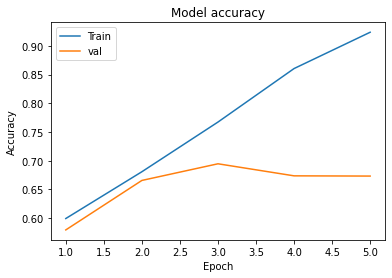

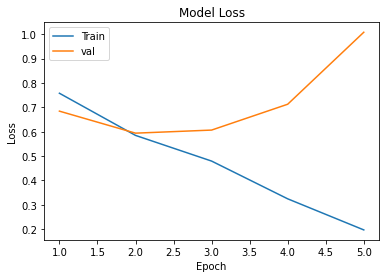

In [41]:
plot_learningCurve(history)

###Implement First 3 Blocks of VGG16 Model

In [42]:
model = Sequential()
model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 activation='relu',
                 padding='same',
                 kernel_initializer='he_uniform',
                 input_shape = (img_width, img_height, 3)
                ))
model.add(MaxPool2D(2,2))


model = Sequential()
model.add(Conv2D(filters=128,
                kernel_size=(3,3),
                activation='relu',
                padding='same',
                 kernel_initializer='he_uniform'
                ))
model.add(MaxPool2D(2,2))

model = Sequential()
model.add(Conv2D(filters=256,
                kernel_size=(3,3),
                activation='relu', 
                padding='same',
                 kernel_initializer='he_uniform'
                ))
model.add(MaxPool2D(2,2))



model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer ='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
opt = SGD(learning_rate = 0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=len(train_generator), 
                                epochs=5, 
                                validation_data=validation_generator
                               )

ResourceExhaustedError: OOM when allocating tensor with shape[2560000,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Mul] name: sequential_9/dense_6/kernel/Initializer/random_uniform/mul/

## Batch Normalisation and Dropout

In [45]:
model = Sequential()
model.add(Conv2D(filters=64, 
               kernel_size=(3,3),
               activation='relu',
               padding='same',
               kernel_initializer='he_uniform',
               input_shape = (img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model = Sequential()
model.add(Conv2D(filters=128, 
                 kernel_size=(3,3), 
                 activation='relu', 
                 padding='same',
                 kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model = Sequential()
model.add(Conv2D(filters=256,
                kernel_size=(3,3),
                activation='relu',
                padding='same',
                kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [46]:
opt = SGD(learning_rate = 0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit_generator(generator=train_generator,
                             steps_per_epoch=len(train_generator),
                             epochs=5,
                             validation_data = validation_generator,
                             validation_steps=len(validation_generator),
                             verbose = 1)

ResourceExhaustedError: OOM when allocating tensor with shape[2560000,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]

In [49]:
def plot_learningCurve(history, epoch):
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()
    
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    

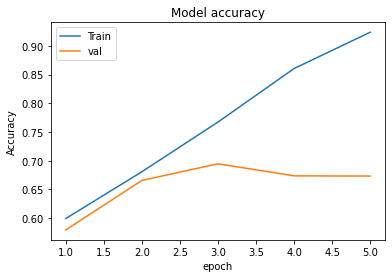

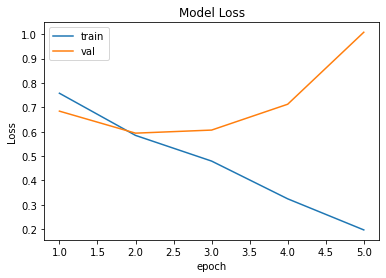

In [50]:
plot_learningCurve(history, 5)